<h1>Лабораторная работа №1.<span class="tocSkip"></span></h1>
<h2>Часть 1</h2>
<div class="toc"><ul class="toc-item"></ul></div>

In [179]:
import pandas as pd
from tabulate import tabulate
data = {
    "Вариант": [24],
    "Параметры (a; σ²)": ["(0;16)"],
    "n": [120],
    "q": [2.3],
    "k": [5],
    "Правило для расчета числа интервалов группировки": ["Фридмана Диакониса"],
    "Закон распределения случайной величины Y": ["F-распределение с числом степеней свободы k1=6 и k2=5"]
}

df = pd.DataFrame(data)
print(tabulate(df, headers='keys', tablefmt='psql', showindex=False))

+-----------+---------------------+-----+-----+-----+----------------------------------------------------+-------------------------------------------------------+
|   Вариант | Параметры (a; σ²)   |   n |   q |   k | Правило для расчета числа интервалов группировки   | Закон распределения случайной величины Y              |
|-----------+---------------------+-----+-----+-----+----------------------------------------------------+-------------------------------------------------------|
|        24 | (0;16)              | 120 | 2.3 |   5 | Фридмана Диакониса                                 | F-распределение с числом степеней свободы k1=6 и k2=5 |
+-----------+---------------------+-----+-----+-----+----------------------------------------------------+-------------------------------------------------------+


In [180]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sci

## 1. Смоделировать выборку из n независимых наблюдений над случайной величиной X, имеющей нормальный закон распределения с параметрами (a; σ²)

In [181]:
#исходные данные задачи 
n=120
mu, sigma = 0, 16 

In [182]:
# Генерация выборки
s = np.random.normal(mu, sigma, n)
print(s)

# Оценка среднего и стандартного отклонения
a_estimate = np.mean(s)  # Среднее
sigma_estimate = np.std(s, ddof=5)  # Стандартное отклонение с поправкой на степень свободы

# Печать оценок
print(f"Оценка среднего (a): {a_estimate}")
print(f"Оценка стандартного отклонения (σ): {sigma_estimate}")

# Дополнительный расчет среднего и стандартного отклонения вручную
# Ручной расчет среднего
manual_mean = sum(s) / n

# Ручной расчет стандартного отклонения
sum_squared_diff = sum((x - manual_mean) ** 2 for x in s)
manual_std_dev = math.sqrt(sum_squared_diff / (n - 1))

print(f"Оценка среднего вручную: {manual_mean}")
print(f"Оценка стандартного отклонения вручную: {manual_std_dev}")

[-23.85888987  -2.07121863  -1.44518462  40.16024009 -24.97806533
  -2.71363683  22.16991121   9.00413803  11.13643413   8.17520687
  -2.2494235   16.69495686 -19.20595417   9.16742228  10.83260295
 -27.2389212   -1.54832685  21.03050962 -22.53167171  15.57099302
 -43.50002915  -6.34668068 -15.83198797  23.44660376  -0.48709889
   3.84938403  17.98206925 -36.7710595   -1.90200941  21.74509659
  35.86799724   8.48168807   6.38175881 -28.60681205 -28.79860446
  19.52604852   4.08622857   6.681331    16.45557159   9.93184383
 -13.50285255  26.46484163 -26.65654375   2.94076931   8.34453618
 -11.79601017  18.63386043  -3.35756986  -8.14118694   4.18331002
  -0.12577291  31.60938584   3.8003585    4.93639718  -7.74398586
  -5.23965541  -1.10152608  -8.98067583  -5.47986244 -32.66067213
  11.29350302 -10.59152314   3.01569658   7.24631094  -0.4170197
  18.65980238  20.75817334  -5.11169942   3.74051792  24.76079469
  -0.8830126   -0.45742524  20.89448576 -39.48419159 -30.4111245
 -10.1387549

## 1.1. Сгруппировать данные в интервалы и найти интервальный ряд абсолютных частот. Число интервалов группировки выбрать в соответствии с правилом, Фридмана Диакониса. Вычислить средствами Python сумму абсолютных частот. Построить гистограмму абсолютных частот.

In [183]:
# Используем правило Фридмана-Диакониса для определения количества интервалов
k_bins = np.histogram_bin_edges(s, bins="fd")
print(f"Количество интервалов: {len(k_bins) - 1}")

# Находим абсолютные частоты для каждого интервала
count, bin_edges = np.histogram(s, bins=k_bins)
print("Абсолютные частоты по интервалам:", count)
print("Границы интервалов:", bin_edges)

# Сумма абсолютных частот
total_count = np.sum(count)
print(f"Сумма абсолютных частот: {total_count}")

# Рассчитываем межквартильный размах (IQR) вручную
q1_manual = np.percentile(s, 25)
q3_manual = np.percentile(s, 75)
iqr_manual = q3_manual - q1_manual

# Ручной расчет ширины интервала и количества интервалов
bin_width_manual = 2 * iqr_manual / np.cbrt(n)
data_range = s.max() - s.min()
num_bins_manual = int(np.ceil(data_range / bin_width_manual))

print(f"Ширина интервала вручную: {bin_width_manual}")
print(f"Количество интервалов вручную: {num_bins_manual}")

# Генерация границ интервалов вручную
bin_edges_manual = np.linspace(s.min(), s.max(), num_bins_manual + 1)

# Расчет абсолютных частот вручную
count_manual = [0] * num_bins_manual
for x in s:
    for i in range(num_bins_manual):
        if bin_edges_manual[i] <= x < bin_edges_manual[i + 1]:
            count_manual[i] += 1
            break
print("Абсолютные частоты вручную:", count_manual)
print("Сумма абсолютных частот вручную:", sum(count_manual))

Количество интервалов: 11
Абсолютные частоты по интервалам: [ 4  6  5  6 21 22 23 11 15  5  2]
Границы интервалов: [-43.50002915 -35.89455013 -28.28907111 -20.68359209 -13.07811306
  -5.47263404   2.13284498   9.738324    17.34380302  24.94928205
  32.55476107  40.16024009]
Сумма абсолютных частот: 120
Ширина интервала вручную: 7.9640142012795705
Количество интервалов вручную: 11
Абсолютные частоты вручную: [4, 6, 5, 6, 21, 22, 23, 11, 15, 5, 1]
Сумма абсолютных частот вручную: 119


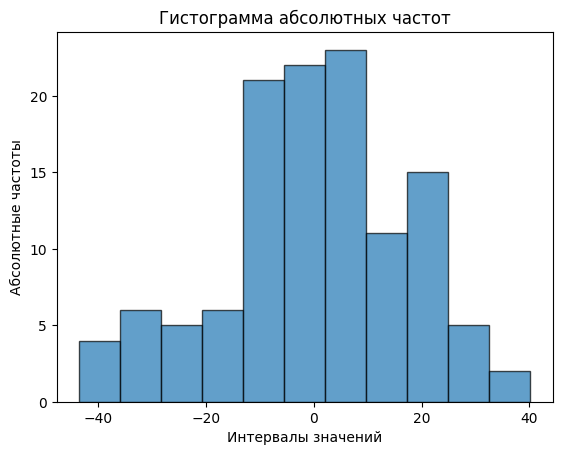

In [184]:
#Построить гистограмму абсолютных частот.
from scipy.stats import norm
# Построение гистограммы
count, bins, ignored = plt.hist(s, bins=k_bins, edgecolor='black', alpha=0.7)

# Добавление заголовков и подписей осей
plt.title("Гистограмма абсолютных частот")
plt.xlabel("Интервалы значений")
plt.ylabel("Абсолютные частоты")

# Отображение гистограммы
plt.show()

## 1.2. Сгруппировать данные в интервалы и найти интервальный ряд относительных частот. Вычислить средствами Python сумму относительных частот. Построить гистограмму относительных частот.


In [185]:
# Вычисление относительных частот
relative_frequencies = count / len(s)
print("Относительные частоты по интервалам:", relative_frequencies)

# Сумма относительных частот (должна быть равна 1)
total_relative_frequency = np.sum(relative_frequencies)
print(f"Сумма относительных частот: {total_relative_frequency}")

# Ручной расчет относительных частот
relative_frequencies_manual = [count / n for count in count_manual]
print("Относительные частоты вручную:", relative_frequencies_manual)
print("Сумма относительных частот вручную:", sum(relative_frequencies_manual))


Относительные частоты по интервалам: [0.03333333 0.05       0.04166667 0.05       0.175      0.18333333
 0.19166667 0.09166667 0.125      0.04166667 0.01666667]
Сумма относительных частот: 1.0
Относительные частоты вручную: [0.03333333333333333, 0.05, 0.041666666666666664, 0.05, 0.175, 0.18333333333333332, 0.19166666666666668, 0.09166666666666666, 0.125, 0.041666666666666664, 0.008333333333333333]
Сумма относительных частот вручную: 0.9916666666666666


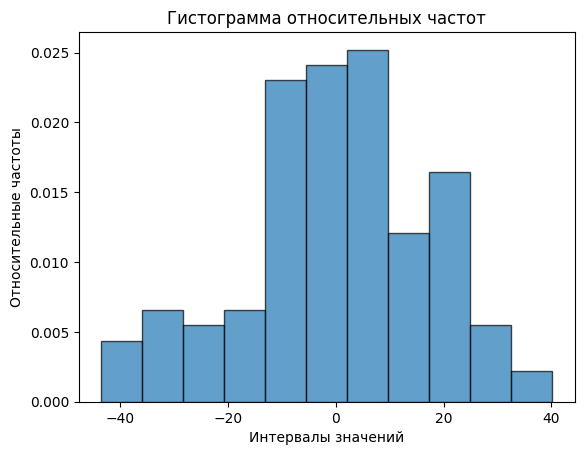

In [186]:
# Построение гистограммы относительных частот
plt.hist(s, bins=k_bins, density=True, edgecolor='black', alpha=0.7)

# Добавление заголовков и подписей осей
plt.title("Гистограмма относительных частот")
plt.xlabel("Интервалы значений")
plt.ylabel("Относительные частоты")

# Отображение гистограммы
plt.show()

## 2.1. Построить гистограмму относительных частот и теоретическую кривую распределения случайной величины X (причем гистограмму и кривую распределения разместить на одном рисунке).

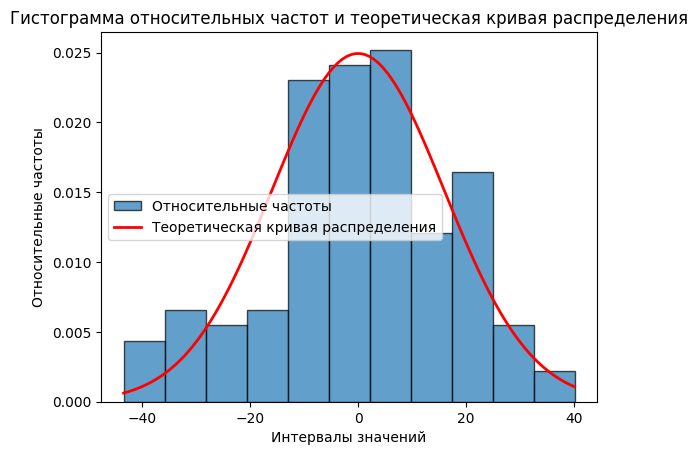

In [187]:
# Построение гистограммы относительных частот
count, bins, ignored = plt.hist(s, bins=k_bins, density=True, edgecolor='black', alpha=0.7, label="Относительные частоты")

# Теоретическая кривая нормального распределения
x = np.linspace(bins[0], bins[-1], 100)
pdf = norm.pdf(x, mu, sigma)  # Функция плотности вероятности

# Наложение кривой нормального распределения
plt.plot(x, pdf, color='red', linewidth=2, label="Теоретическая кривая распределения")

# Добавление заголовков, подписей осей и легенды
plt.title("Гистограмма относительных частот и теоретическая кривая распределения")
plt.xlabel("Интервалы значений")
plt.ylabel("Относительные частоты")
plt.legend()

# Отображение графика
plt.show()

## 2.2. Построить гистограмму абсолютных частот и график теоретической частоты распределения случайной величины X (причем и гистограмму, и график теоретической частоты разместить на одном рисунке).

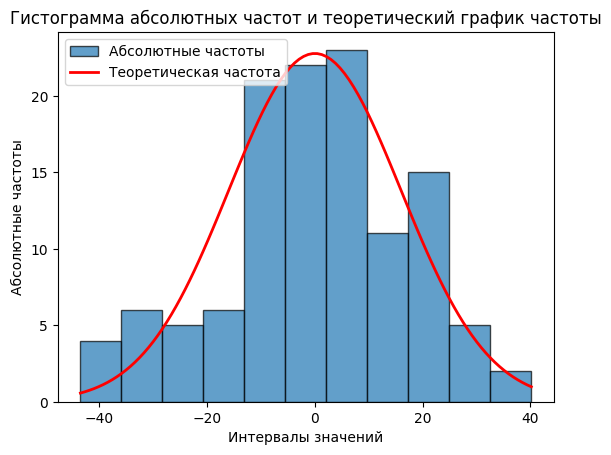

In [188]:
# Построение гистограммы абсолютных частот
count, bins, ignored = plt.hist(s, bins=k_bins, edgecolor='black', alpha=0.7, label="Абсолютные частоты")

# Вычисление значений для оси x и масштабированной теоретической частоты
x = np.linspace(bins[0], bins[-1], 100)
pdf_scaled = norm.pdf(x, mu, sigma) * n * (bins[1] - bins[0])

# Наложение теоретического графика частот
plt.plot(x, pdf_scaled, color='red', linewidth=2, label="Теоретическая частота")

# Добавление заголовков, подписей осей и легенды
plt.title("Гистограмма абсолютных частот и теоретический график частоты")
plt.xlabel("Интервалы значений")
plt.ylabel("Абсолютные частоты")
plt.legend()

# Отображение графика
plt.show()

## 2.3. Построить по выборке график эмпирической функции распределения случайной величины X (кумуляту относительных частот) и график теоретической функции распределения случайной величины X, разместив их на одном рисунке.

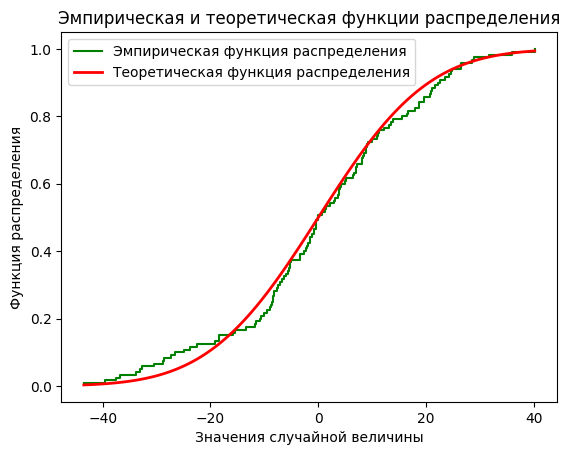

In [189]:
# Сортируем выборку для построения эмпирической функции распределения
s_sorted = np.sort(s)
# Вычисляем кумуляту относительных частот (ECDF)
empirical_cdf = np.arange(1, n + 1) / n

# Создаем значения для теоретической функции распределения (CDF)
x = np.linspace(min(s_sorted), max(s_sorted), 100)
theoretical_cdf = norm.cdf(x, mu, sigma)

# Построение графика эмпирической и теоретической функции распределения
plt.step(s_sorted, empirical_cdf, where='post', label="Эмпирическая функция распределения", color="green")
plt.plot(x, theoretical_cdf, label="Теоретическая функция распределения", color="red", linewidth=2)

# Добавление заголовков, подписей осей и легенды
plt.title("Эмпирическая и теоретическая функции распределения")
plt.xlabel("Значения случайной величины")
plt.ylabel("Функция распределения")
plt.legend()

# Отображение графика
plt.show()

## 2.4. Построить по выборке бокс-плот распределения (“ящик с усами”) и дать ему статистическую интерпретацию. В частности, ответить на вопрос: Каково теоретически ожидаемое число выбросов для выборки данного объема?

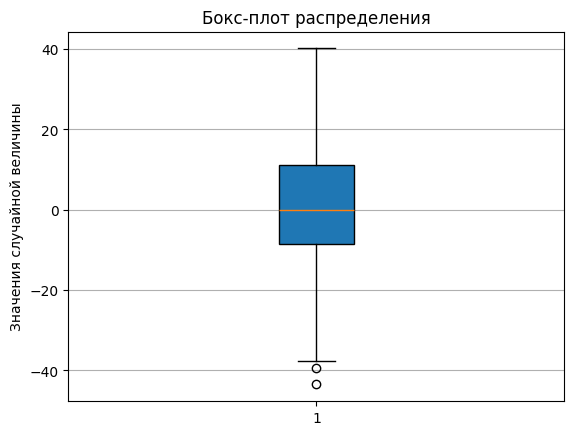

In [190]:
# Построение бокс-плота
plt.boxplot(s, vert=True, patch_artist=True)
plt.title("Бокс-плот распределения")
plt.ylabel("Значения случайной величины")
plt.grid(axis='y')

# Отображение графика
plt.show()

Q1 (25-й перцентиль): -8.465246632359086
Медиана (Q2, 50-й перцентиль): -0.09525235949016056
Q3 (75-й перцентиль): 11.175701350975928
IQR (межквартильный размах): 19.640947983335014
Нижняя граница уса: -37.926668607361606
Верхняя граница уса: 40.63712332597845
Выбросы: [np.float64(-43.50002915483182), np.float64(-39.484191590180615)]
Теоретически ожидаемое число выбросов для выборки объема 120: 0.84


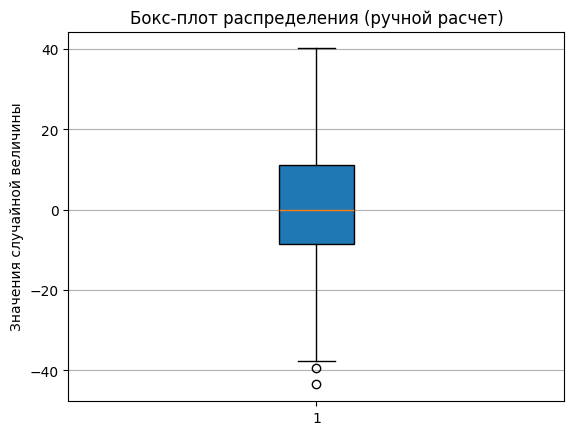

In [191]:
# Сортируем выборку
sorted_sample = np.sort(s)

# Определение квартилей и медианы вручную
q1 = np.percentile(sorted_sample, 25)
q2 = np.median(sorted_sample)
q3 = np.percentile(sorted_sample, 75)
iqr = q3 - q1

print(f"Q1 (25-й перцентиль): {q1}")
print(f"Медиана (Q2, 50-й перцентиль): {q2}")
print(f"Q3 (75-й перцентиль): {q3}")
print(f"IQR (межквартильный размах): {iqr}")

# Рассчитаем границы усов
lower_whisker = q1 - 1.5 * iqr
upper_whisker = q3 + 1.5 * iqr

# Определим выбросы как значения за пределами усов
outliers = [x for x in sorted_sample if x < lower_whisker or x > upper_whisker]

print(f"Нижняя граница уса: {lower_whisker}")
print(f"Верхняя граница уса: {upper_whisker}")
print(f"Выбросы: {outliers}")

expected_outliers = n * 0.007
print(f"Теоретически ожидаемое число выбросов для выборки объема {n}: {expected_outliers}")

# Построение бокс-плота с использованием рассчитанных вручную значений
plt.boxplot(sorted_sample, vert=True, patch_artist=True)
plt.title("Бокс-плот распределения (ручной расчет)")
plt.ylabel("Значения случайной величины")
plt.grid(axis='y')

plt.show()

Оценка вероятности попадания в 5-ый интервал: 0.175


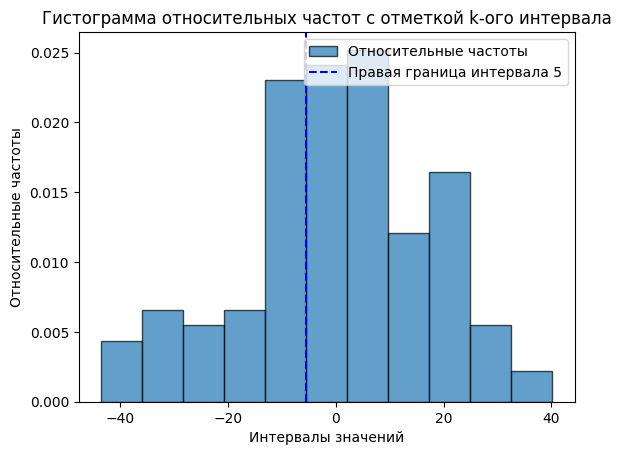

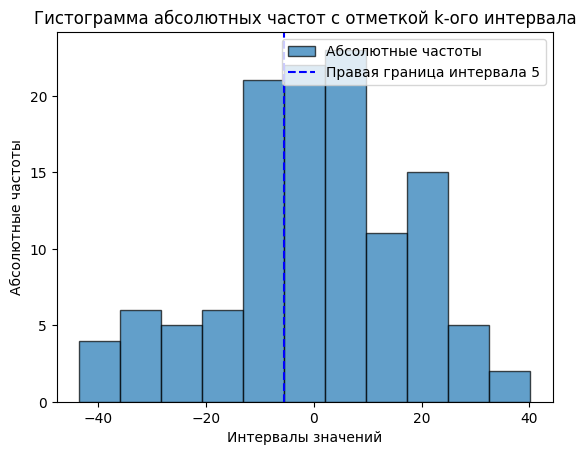

Оценка значения интегральной функции распределения в правой границе 5-ого интервала: 0.35
Точное значение интегральной функции распределения в правой границе 5-ого интервала: 0.366160535117755


In [192]:
# A) Оценка вероятности попадания значений случайной величины X в k-ый интервал
k = 5
probability_k_interval = relative_frequencies[k - 1]  # k-ый интервал соответствует индексу k-1
print(f"Оценка вероятности попадания в {k}-ый интервал: {probability_k_interval}")

# B) График с геометрической интерпретацией этой оценки
plt.hist(s, bins=k_bins, density=True, edgecolor='black', alpha=0.7, label="Относительные частоты")
plt.axvline(x=bin_edges[k], color='blue', linestyle='--', label=f'Правая граница интервала {k}')
plt.title("Гистограмма относительных частот с отметкой k-ого интервала")
plt.xlabel("Интервалы значений")
plt.ylabel("Относительные частоты")
plt.legend()
plt.show()

# C) График с геометрической интерпретацией вероятности попадания в k-ый интервал
plt.hist(s, bins=k_bins, edgecolor='black', alpha=0.7, label="Абсолютные частоты")
plt.axvline(x=bin_edges[k], color='blue', linestyle='--', label=f'Правая граница интервала {k}')
plt.title("Гистограмма абсолютных частот с отметкой k-ого интервала")
plt.xlabel("Интервалы значений")
plt.ylabel("Абсолютные частоты")
plt.legend()
plt.show()

# D) Оценка значения интегральной функции распределения в правой границе k-ого интервала
# Эмпирическая функция распределения в правой границе интервала
empirical_cdf_value = empirical_cdf[np.digitize(bin_edges[k], s_sorted) - 1]  # значение CDF в правой границе
print(f"Оценка значения интегральной функции распределения в правой границе {k}-ого интервала: {empirical_cdf_value}")

# Точное значение интегральной функции распределения
exact_cdf_value = norm.cdf(bin_edges[k], mu, sigma)
print(f"Точное значение интегральной функции распределения в правой границе {k}-ого интервала: {exact_cdf_value}")